<a href="https://colab.research.google.com/github/NN2777/Phyton-Image-Processing/blob/main/Praktikum_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
lena = cv.imread("/content/drive/MyDrive/koceng/lena.jpg")

rows, cols = (lena.shape[0], lena.shape[1])
R = [[0 for i in range(cols)] for j in range(rows)]
G = [[0 for i in range(cols)] for j in range(rows)]
B = [[0 for i in range(cols)] for j in range(rows)]

for y in range(lena.shape[0]):
  for x in range(lena.shape[1]):
    for c in range(lena.shape[2]):
      count (c);

NameError: ignored

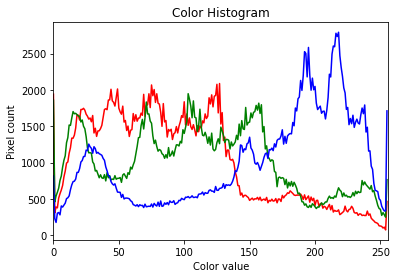

In [8]:
lena = cv.imread("/content/drive/MyDrive/koceng/lena.jpg")
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        lena[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

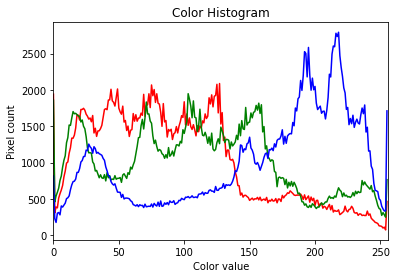

262144


In [9]:
lena = cv.imread("/content/drive/MyDrive/koceng/lena.jpg")
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        lena[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()
print(lena.shape[0]*lena.shape[1])

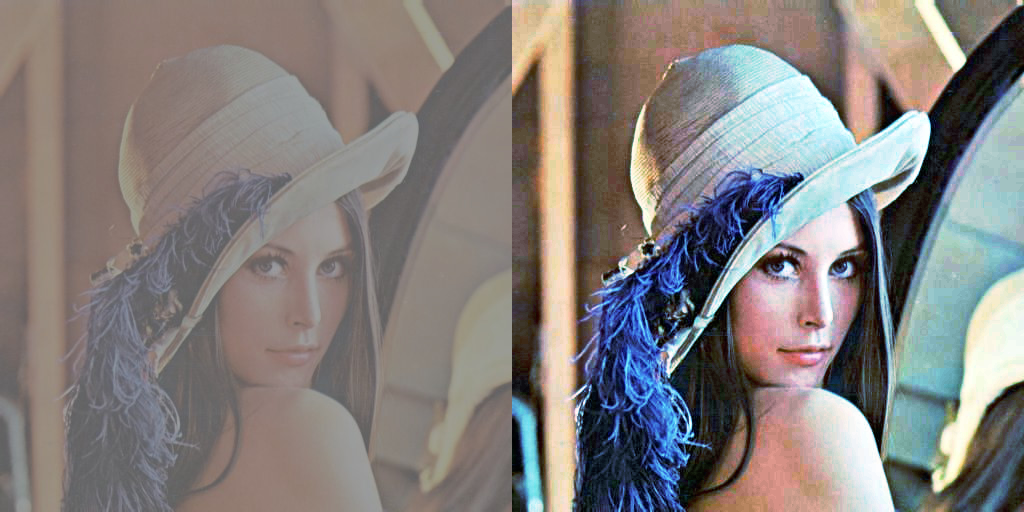

<BarContainer object of 256 artists>

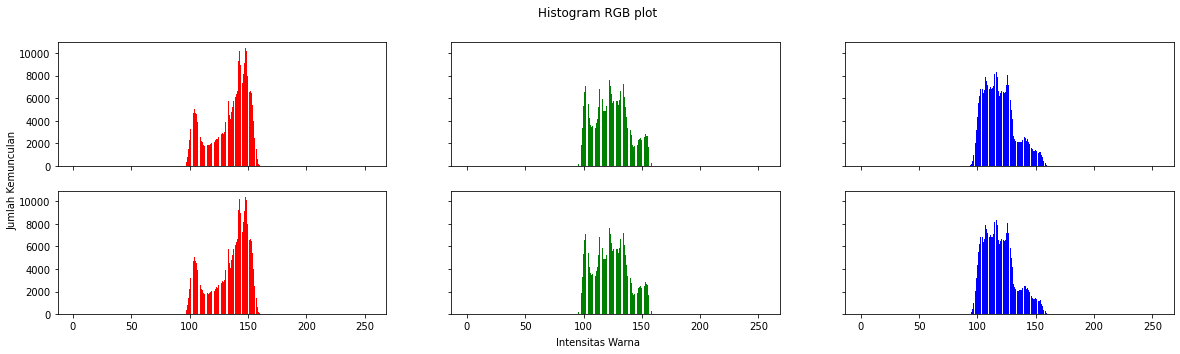

In [16]:
lena_lc = cv.imread("/content/drive/MyDrive/koceng/lena_lc.jpg")
# red = lena_lc[:, :, 0]
# green = lena_lc[:, :, 1]
# blue = lena_lc[:, :, 2]
# equhest_red = cv.equalizeHist(red)
# equhest_green = cv.equalizeHist(green)
# equhest_blue = cv.equalizeHist(blue)
# cv2_imshow(equhest_red)
# cv2_imshow(equhest_green)
# cv2_imshow(equhest_blue)

def histog(img1):
  height, width, depth = np.shape(img1) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1 
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1 
  return ax


channels = cv.split(lena_lc)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

histo_asli = histog(lena_lc)

final_frame = cv.hconcat((lena_lc, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, histo_asli[2], color='red')
axs[1,1].bar(names, histo_asli[1], color='green')
axs[1,2].bar(names, histo_asli[0], color='blue')

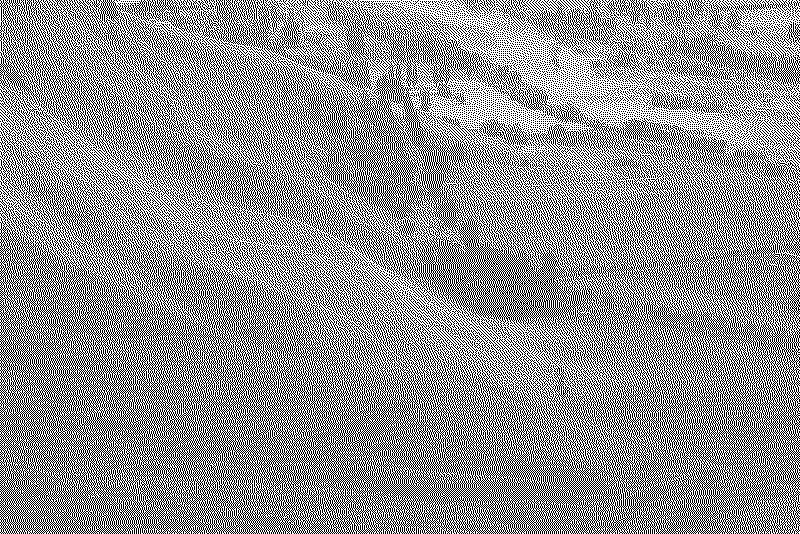

In [12]:
Image = cv.imread('/content/drive/MyDrive/koceng/wiki.jpg')

GrayImage = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)
cv.imwrite('/content/drive/MyDrive/koceng/wiki2.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv.imwrite('/content/drive/MyDrive/koceng/wiki2.jpg', GrayImage)
cv2_imshow(GrayImage)